In [28]:
# ! pip install pyLDAvis
! pip install konlpy
import konlpy
from konlpy.tag import Kkma
from konlpy.utils import pprint
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data = pd.read_csv('/content/drive/Shareddrives/🥑PSAT_DM_2728🥑/Dataset/기사크롤링_TFIDF/IT&기술_20211024_TFIDF.csv', encoding = 'utf-8')

In [30]:
data

,title,content,sub_category,token,eng,token_okt,eng_okt,clean_words,clean_as_sentence,important_words
0,OTT 이어 방송사도 끝없는 음악 사용료 갈등 차민영의 포스트IT,음악이 방송에 기여하는 수준 두고 PP협의회 음저협 간 갈등 지속 단체협상 결렬 후...,IT일반,"[('음악', 'NNG'), ('이', 'JKS'), ('방송', 'NNG'), (...","['PP', 'PP', 'OTT', 'PP', 'PP', 'TV', 'PP', 'P...","[('음악', 'Noun'), ('이', 'Josa'), ('방송', 'Noun')...","['PP', 'PP', 'OTT', 'PP', 'PP', 'TV', 'PP', 'P...","['음악', '방송', '기여', '수준', '두고', 'PP', '협의', '음저...",음악 방송 기여 수준 두고 PP 협의 음저협 갈등 지속 단체 협상 결렬 후 개별 P...,"[Index(['pp', '계약', '고민', '관리', '규정', '기여', '논..."
1,나로호 때도 5개월 누리호 실패 원인 금방 안 나오는 이유는,사용된 부품만 37만개 생선뼈처럼 발라봐야 안다 한국형 발사체 누리호 KS...,IT일반,"[('사용', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('...","['KSLV', 'II', 'KSLV', 'II', 'QLM', 'Quick', '...","[('사용', 'Noun'), ('된', 'Verb'), ('부품', 'Noun')...","['KSLV', 'II', 'KSLV', 'II', 'QLM', 'Quick', '...","['사용', '부품', '생선', '뼈', '발라', '봐야', '발사체', '누리...",사용 부품 생선 뼈 발라 봐야 발사체 누리 호 KSLV II 오전 전남 고흥군 나로...,"[Index(['kslv', '검증', '결과', '공급', '과정', '과학기술'..."
2,정의선 회장 인도네시아 도착 조코위 대통령과 전기차 협력 논의할 듯,정의선 현대자동차그룹 회장 현대차그룹 제공 미국 출장을 마친 정의선 현대차그룹...,IT일반,"[('정의', 'NNG'), ('선', 'NNG'), ('현대자동차', 'NNG')...","['JI', 'LG', 'KNIC']","[('정의선', 'Noun'), ('현대', 'Noun'), ('자동차', 'Nou...","['JI', 'LG', 'KNIC']","['정의선', '현대', '자동차', '그룹', '회장', '현대차', '그룹', ...",정의선 현대 자동차 그룹 회장 현대차 그룹 미국 출장 마친 정의선 현대차 그룹 회장...,"[Index(['공략', '공장', '그룹', '대통령', '되며', '맞춰', '..."
3,KIST 홍릉강소특구 바이오창업메카로 키운다,홍릉강소특구 GRaND K 창업학교 마무리 11개 투자입상팀 전원 투자의향 ...,IT일반,"[('홍', 'NNG'), ('릉', 'UN'), ('강', 'NNG'), ('소'...","['GRaND', 'K', 'KIST', 'GRaND', 'K', 'KIST', '...","[('홍릉', 'Noun'), ('강소', 'Noun'), ('특구', 'Noun'...","['GRaND', 'K', 'KIST', 'GRaND', 'K', 'KIST', '...","['홍릉', '강소', '특구', 'GRaND', 'K', '창업', '학교', '...",홍릉 강소 특구 GRaND K 창업 학교 마무리 투자 입상 팀 전원 투자 의향 확보...,"[Index(['기관', '기념', '기술', '기업', '노력', '대상', '대..."
4,3분기 공모주 열기 가상화폐 반등 불법 스팸 도 700만건,스팸 차단 앱 후후 후후앤컴퍼니 3분기 신고 스팸 통계 분석 결과 756만건 접...,IT일반,"[('스팸', 'UN'), ('차단', 'NNG'), ('앱', 'UN'), ('후...",['IT'],"[('스팸', 'Noun'), ('차단', 'Noun'), ('앱', 'Noun')...",['IT'],"['스팸', '차단', '앱', '앤', '컴퍼니', '신고', '스팸', '통계'...",스팸 차단 앱 앤 컴퍼니 신고 스팸 통계 분석 결과 접수 늘어 대형 모주 청약 열풍...,"[Index(['가상', '건수', '결과', '관심', '권유', '금융', '대..."
...,...,...,...,...,...,...,...,...,...,...
339,DD 퇴근길 거의 성공했는데 누리호 아쉽지만 장하다,디지털데일리가 퇴근 즈음해서 읽을 수 있는 DD퇴근길 코너를 마련했습니다 혹시...,컴퓨터,"[('디지털', 'NNG'), ('데일리', 'NNG'), ('가', 'JKS'),...","['DD', 'KSLV', 'II', 'km', 'TV', 'LG', 'LG', '...","[('디지털', 'Noun'), ('데일', 'Noun'), ('리가', 'Noun...","['DD', 'KSLV', 'II', 'km', 'TV', 'LG', 'LG', '...","['데일', '리가', '퇴근', '읽을', '있는', 'DD', '퇴근길', '코...",데일 리가 퇴근 읽을 있는 DD 퇴근길 코너 마련 했습니다 오늘 놓치지는 않으셨나요...,"[Index(['lg', 'oled', '가능성', '게임', '계획', '공급',..."
340,세일즈포스가 위드 코로나 를 지원하는 방법 백신 클라우드,디지털데일리 이종현기자 국내서도 코로나19와 함께하는 위드 코로나 가 초읽기에...,컴퓨터,"[('디지털', 'NNG'), ('데일리', 'NNG'), ('이종', 'NNG')...","['IBM', 'KPMG', 'CDR', 'MS', 'VIC']","[('디지털', 'Noun'), ('데', 'Noun'), ('일리', 'Noun'...","['IBM', 'KPMG', 'CDR', 'MS', 'VIC']","['이종현', '서도', '코로나', '위드', '코로나', '초읽기', '들어간'...",이종현 서도 코로나 위드 코로나 초읽기 들어간 가운데 포스 백신 클라우드 통해 이를...,"[Index(['개발', '관리', '기관', '기업', '단계', '따른', '백..."
341,IT돋보기 해외 클라우드 기업 한국땅에 데이터센터 올린다 왜,MS 알리바바클라우드 등 사례 오라클은 글로벌 리전 구축 계획 글로벌 클라우드 서비...,컴퓨터,"[('MS', 'OL'), ('알', 'NNG'), ('리', 'NNG'), ('바...","['MS', 'MS', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'ms...","[('MS', 'Alpha'), ('알리바바', 'Noun'), ('클라우드', '...","['MS', 'MS', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'ms...","['MS', '알리바바', '클라우드', '사례', '오라클', '글로벌', '리전...",MS 알리바바 클라우드 사례 오라클 글로벌 리전 구축 계획 글로벌 클라우드 서비스 ...,"[Index(['계획', '고객', '공략', '구축', '그룹', '글로벌', '..."
342,앱 소문 통해 국산SW 공공시장서 더 많이 유통되게,송영선 한국상용SW협회장 2021 글로벌 상용SW명품대전 서 밝혀 우리 협회가 ...,컴퓨터,"[('송', 'NNG'), ('영선', 'NNG'), ('한국', 'NNG'), (...","['SW', 'SW', 'SW', 'SW', 'SW', 'PMO', 'SW', 'S...","[('송영선', 'Noun'), ('한국', 'Noun'), ('상용', 'Noun...","['SW', 'SW', 'SW', 'SW', 'SW', 'PMO', 'SW', 'S...","['송영선', '상용', 'SW', '협회장', '글로벌', '상용', 'SW', ...",송영선 상용 SW 협회장 글로벌 상용 SW 명품 대전 밝혀 협회 만들고 있는 앱 소...,"[Index(['sw', '글로벌', '대전', '명품', '발주'

In [31]:
def slice(temp):
  index1=temp.find('[', 1)
  index2 = temp.find(']', 0)
  return temp[index1:(index2+1)]

data['important_words'] = data['important_words'].apply(slice)
data['important_words'] = data['important_words'].apply(lambda k: eval(''.join(k)))

In [32]:
data["important_words"]

0      [pp, 계약, 고민, 관리, 규정, 기여, 논란, 단체, 되지, 두고, 방송, 부...
1      [kslv, 검증, 결과, 공급, 과정, 과학기술, 구진, 그래픽, 기술, 나로, ...
2      [공략, 공장, 그룹, 대통령, 되며, 맞춰, 미국, 배터리, 보유, 부품, 산업,...
3      [기관, 기념, 기술, 기업, 노력, 대상, 대회, 도전, 라운드, 마무리, 바이오...
4      [가상, 건수, 결과, 관심, 권유, 금융, 대비, 대출, 동기, 모주, 상승, 수...
                             ...                        
339    [lg, oled, 가능성, 게임, 계획, 공급, 궤도, 네트워크, 누리, 대상, ...
340    [개발, 관리, 기관, 기업, 단계, 따른, 백신, 사태, 수행, 시대, 안전, 역...
341    [계획, 고객, 공략, 구축, 그룹, 글로벌, 기술, 기업, 네트워크, 높이기, 대...
342    [sw, 글로벌, 대전, 명품, 발주, 부문, 산업, 상용, 정보, 정책, 정통부,...
343    [개발, 개발자, 개방, 고민, 공개, 구축, 기능, 다양한, 데이터, 문서, 버전...
Name: important_words, Length: 344, dtype: object

In [33]:
data

,title,content,sub_category,token,eng,token_okt,eng_okt,clean_words,clean_as_sentence,important_words
0,OTT 이어 방송사도 끝없는 음악 사용료 갈등 차민영의 포스트IT,음악이 방송에 기여하는 수준 두고 PP협의회 음저협 간 갈등 지속 단체협상 결렬 후...,IT일반,"[('음악', 'NNG'), ('이', 'JKS'), ('방송', 'NNG'), (...","['PP', 'PP', 'OTT', 'PP', 'PP', 'TV', 'PP', 'P...","[('음악', 'Noun'), ('이', 'Josa'), ('방송', 'Noun')...","['PP', 'PP', 'OTT', 'PP', 'PP', 'TV', 'PP', 'P...","['음악', '방송', '기여', '수준', '두고', 'PP', '협의', '음저...",음악 방송 기여 수준 두고 PP 협의 음저협 갈등 지속 단체 협상 결렬 후 개별 P...,"[pp, 계약, 고민, 관리, 규정, 기여, 논란, 단체, 되지, 두고, 방송, 부..."
1,나로호 때도 5개월 누리호 실패 원인 금방 안 나오는 이유는,사용된 부품만 37만개 생선뼈처럼 발라봐야 안다 한국형 발사체 누리호 KS...,IT일반,"[('사용', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('...","['KSLV', 'II', 'KSLV', 'II', 'QLM', 'Quick', '...","[('사용', 'Noun'), ('된', 'Verb'), ('부품', 'Noun')...","['KSLV', 'II', 'KSLV', 'II', 'QLM', 'Quick', '...","['사용', '부품', '생선', '뼈', '발라', '봐야', '발사체', '누리...",사용 부품 생선 뼈 발라 봐야 발사체 누리 호 KSLV II 오전 전남 고흥군 나로...,"[kslv, 검증, 결과, 공급, 과정, 과학기술, 구진, 그래픽, 기술, 나로, ..."
2,정의선 회장 인도네시아 도착 조코위 대통령과 전기차 협력 논의할 듯,정의선 현대자동차그룹 회장 현대차그룹 제공 미국 출장을 마친 정의선 현대차그룹...,IT일반,"[('정의', 'NNG'), ('선', 'NNG'), ('현대자동차', 'NNG')...","['JI', 'LG', 'KNIC']","[('정의선', 'Noun'), ('현대', 'Noun'), ('자동차', 'Nou...","['JI', 'LG', 'KNIC']","['정의선', '현대', '자동차', '그룹', '회장', '현대차', '그룹', ...",정의선 현대 자동차 그룹 회장 현대차 그룹 미국 출장 마친 정의선 현대차 그룹 회장...,"[공략, 공장, 그룹, 대통령, 되며, 맞춰, 미국, 배터리, 보유, 부품, 산업,..."
3,KIST 홍릉강소특구 바이오창업메카로 키운다,홍릉강소특구 GRaND K 창업학교 마무리 11개 투자입상팀 전원 투자의향 ...,IT일반,"[('홍', 'NNG'), ('릉', 'UN'), ('강', 'NNG'), ('소'...","['GRaND', 'K', 'KIST', 'GRaND', 'K', 'KIST', '...","[('홍릉', 'Noun'), ('강소', 'Noun'), ('특구', 'Noun'...","['GRaND', 'K', 'KIST', 'GRaND', 'K', 'KIST', '...","['홍릉', '강소', '특구', 'GRaND', 'K', '창업', '학교', '...",홍릉 강소 특구 GRaND K 창업 학교 마무리 투자 입상 팀 전원 투자 의향 확보...,"[기관, 기념, 기술, 기업, 노력, 대상, 대회, 도전, 라운드, 마무리, 바이오..."
4,3분기 공모주 열기 가상화폐 반등 불법 스팸 도 700만건,스팸 차단 앱 후후 후후앤컴퍼니 3분기 신고 스팸 통계 분석 결과 756만건 접...,IT일반,"[('스팸', 'UN'), ('차단', 'NNG'), ('앱', 'UN'), ('후...",['IT'],"[('스팸', 'Noun'), ('차단', 'Noun'), ('앱', 'Noun')...",['IT'],"['스팸', '차단', '앱', '앤', '컴퍼니', '신고', '스팸', '통계'...",스팸 차단 앱 앤 컴퍼니 신고 스팸 통계 분석 결과 접수 늘어 대형 모주 청약 열풍...,"[가상, 건수, 결과, 관심, 권유, 금융, 대비, 대출, 동기, 모주, 상승, 수..."
...,...,...,...,...,...,...,...,...,...,...
339,DD 퇴근길 거의 성공했는데 누리호 아쉽지만 장하다,디지털데일리가 퇴근 즈음해서 읽을 수 있는 DD퇴근길 코너를 마련했습니다 혹시...,컴퓨터,"[('디지털', 'NNG'), ('데일리', 'NNG'), ('가', 'JKS'),...","['DD', 'KSLV', 'II', 'km', 'TV', 'LG', 'LG', '...","[('디지털', 'Noun'), ('데일', 'Noun'), ('리가', 'Noun...","['DD', 'KSLV', 'II', 'km', 'TV', 'LG', 'LG', '...","['데일', '리가', '퇴근', '읽을', '있는', 'DD', '퇴근길', '코...",데일 리가 퇴근 읽을 있는 DD 퇴근길 코너 마련 했습니다 오늘 놓치지는 않으셨나요...,"[lg, oled, 가능성, 게임, 계획, 공급, 궤도, 네트워크, 누리, 대상, ..."
340,세일즈포스가 위드 코로나 를 지원하는 방법 백신 클라우드,디지털데일리 이종현기자 국내서도 코로나19와 함께하는 위드 코로나 가 초읽기에...,컴퓨터,"[('디지털', 'NNG'), ('데일리', 'NNG'), ('이종', 'NNG')...","['IBM', 'KPMG', 'CDR', 'MS', 'VIC']","[('디지털', 'Noun'), ('데', 'Noun'), ('일리', 'Noun'...","['IBM', 'KPMG', 'CDR', 'MS', 'VIC']","['이종현', '서도', '코로나', '위드', '코로나', '초읽기', '들어간'...",이종현 서도 코로나 위드 코로나 초읽기 들어간 가운데 포스 백신 클라우드 통해 이를...,"[개발, 관리, 기관, 기업, 단계, 따른, 백신, 사태, 수행, 시대, 안전, 역..."
341,IT돋보기 해외 클라우드 기업 한국땅에 데이터센터 올린다 왜,MS 알리바바클라우드 등 사례 오라클은 글로벌 리전 구축 계획 글로벌 클라우드 서비...,컴퓨터,"[('MS', 'OL'), ('알', 'NNG'), ('리', 'NNG'), ('바...","['MS', 'MS', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'ms...","[('MS', 'Alpha'), ('알리바바', 'Noun'), ('클라우드', '...","['MS', 'MS', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'ms...","['MS', '알리바바', '클라우드', '사례', '오라클', '글로벌', '리전...",MS 알리바바 클라우드 사례 오라클 글로벌 리전 구축 계획 글로벌 클라우드 서비스 ...,"[계획, 고객, 공략, 구축, 그룹, 글로벌, 기술, 기업, 네트워크, 높이기, 대..."
342,앱 소문 통해 국산SW 공공시장서 더 많이 유통되게,송영선 한국상용SW협회장 2021 글로벌 상용SW명품대전 서 밝혀 우리 협회가 ...,컴퓨터,"[('송', 'NNG'), ('영선', 'NNG'), ('한국', 'NNG'), (...","['SW', 'SW', 'SW', 'SW', 'SW', 'PMO', 'SW', 'S...","[('송영선', 'Noun'), ('한국', 'Noun'), ('상용', 'Noun...","['SW', 'SW', 'SW', 'SW', 'SW', 'PMO', 'SW', 'S...","['송영선', '상용', 'SW', '협회장', '글로벌', '상용', 'SW', ...",송영선 상용 SW 협회장 글로벌 상용 SW 명품 대전 밝혀 협회 만들고 있는 앱 소...,"[sw, 글로벌, 대전, 명품, 발주, 부문, 산업, 상용, 정보,

# **LDA 모델링 시작**

In [34]:
import pandas as pd
import numpy as np
import re
# import coredottext.nlp as nlp
import json
import warnings
# import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
import time

In [35]:
# 문서를 사전 형식으로 만들기
tokenized_doc=data["important_words"]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
# 두번째 뉴스 결과 출력: (단어의 정수, 단어의 빈도 수)
print(corpus[1])

[(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)]


In [36]:
len(dictionary)

1000

### Parameter tuning
1) topic : 당신이 가설로 잡은 토픽의 갯수는?

2) chunksize : 얼마나 많은 문서가 훈련 알고리즘에 사용되는가?
만약에 빠른 학습이 중요하시다면, 청크사이즈를 키워서 돌려봅시다!
Hoffman의 논문에 의하면 Chunksize는 모델 품질에 영향을 미치지만 차이그 그렇게 크진 않다고 합니다!

3) passes : 패스는 모델 학습시 전체 코퍼스에서 모델을 학습시키는 빈도를 제어한다고 합니다.
epochs 와 같은 용어 같다!
model를 학습시키는 횟수를 말하는것 같아요! model sampling?

4) iteration : 각각 문서에 대해서 루프를 얼마나 돌리는지를 제어한다고 합니다.
pass & iteration 은 최대한 많은게 좋다!

5) eval_every = 1 in LdaModel

6) alpha, eta = auto, 디리클레 분포의 감마함수에 대한 파라미터입니다!


In [16]:
# coherences: 상위 단어들간 유사도: 해당주제와 얼마나 의미론적으로 일치하는 단어들이 모여있는지.
# perplexity: 혼란도: 실제로 관측되는 값을 얼마나 잘 예측하는지. 작을수록 좋음!
# coherence를 두단어간 조합으로 검사를 하되, 한 단어가 다른 단어와 다른 문서들에서 얼마나 많이 쓰였는지 frequency를 검사.
coherences=[]
perplexities=[]
passes=[]
# warnings.filterwarnings('ignore')
# passes tuning
for i in range(10):
    ntopics, nwords = 30, 1000
    if i==0:
        p=1
    else:
        p=i*5
    passes.append(p)
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 2.0476222038269043
Coherence -6.527964090931578
Perplexity:  -9.455491314820197 




/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


epoch 5 4.6224915981292725
Coherence -5.675121174223746
Perplexity:  -8.595154163280172 


epoch 10 7.867735147476196
Coherence -5.582987417277586
Perplexity:  -8.086474350913974 


epoch 15 10.87841272354126
Coherence -5.938938324414135
Perplexity:  -7.965198587914181 


epoch 20 14.108814001083374
Coherence -5.442394679331188
Perplexity:  -7.895252941430256 


epoch 25 16.817861318588257
Coherence -5.375107859631223
Perplexity:  -7.822105592494969 


epoch 30 20.176762104034424
Coherence -5.510241919152406
Perplexity:  -7.812266966059423 


epoch 35 23.148892164230347
Coherence -5.910464446117983
Perplexity:  -7.8356436349666945 


epoch 40 26.24169898033142
Coherence -5.250753820694642
Perplexity:  -7.795677223417142 


epoch 45 28.87274169921875
Coherence -5.341092004076351
Perplexity:  -7.782395493610425 




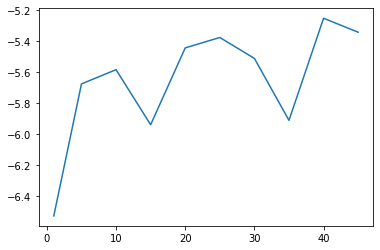

In [17]:
import matplotlib.pyplot as plt
plt.plot(passes,coherences)
plt.show()

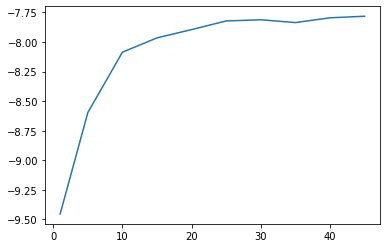

In [18]:
plt.plot(passes,perplexities)
plt.show()  

In [19]:
# 30으로 택하기
# coherence는 shvdmf tnfhr 좋음음
# 최적의 topic 개수는?
coherencesT=[]
perplexitiesT=[]
numtopic=[]
# warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 20*i
    nwords = 100
    numtopic.append(ntopics)
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=30)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 10.685884714126587
Cpherence -4.946053362399412
Perplexity:  -6.7689540969960005 


ntopics 20 7.483750581741333
Cpherence -5.374422626662254
Perplexity:  -6.948432235220487 


ntopics 40 9.149549722671509
Cpherence -5.062799234964634
Perplexity:  -7.173628922992111 


ntopics 60 8.396946430206299
Cpherence -5.035108603524796
Perplexity:  -7.357860454555911 


ntopics 80 12.744861602783203
Cpherence -5.050763274686161
Perplexity:  -7.4977444023354645 




/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


ntopics 100 12.762553453445435
Cpherence -5.4066385987007815
Perplexity:  -7.580112394573116 


ntopics 120 10.290688514709473
Cpherence -5.15037977999455
Perplexity:  -7.612448376535339 


ntopics 140 15.569634199142456
Cpherence -5.439239199859311
Perplexity:  -7.631696642658182 


ntopics 160 18.20804214477539
Cpherence -5.4829871178215885
Perplexity:  -7.723041229216186 


ntopics 180 18.703031539916992
Cpherence -5.320141578898975
Perplexity:  -7.736060502628268 




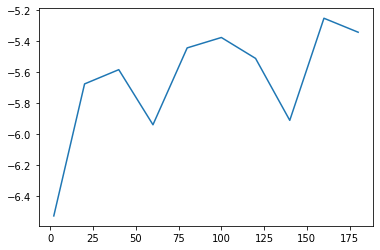

In [20]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(numtopic,coherences)
plt.show()

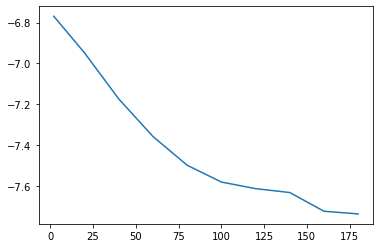

In [21]:
import matplotlib.pyplot as plt
plt.plot(numtopic,perplexitiesT)
plt.show()

In [ ]:
# 이중 for문
ncoherences=[]
nperplexities=[]
npasses=[]
# warnings.filterwarnings('ignore')
# passes tuning
for i in range(10):
  for j in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 20*i
    if i==0:
        p=1
    else:
        p=i*5
    nwords = 1000
    passes.append(p)
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

In [ ]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(numtopic,ncoherences)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(numtopic,nperplexitiesT)
plt.show()

In [37]:
# 최종 토픽 내용 보기
# topic 50개!!
import gensim
NUM_TOPICS = 50 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=30)
# topic중 상위 10개 단어 뽑아내기기
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

(49, '0.039*"발사" + 0.036*"위성" + 0.036*"누리" + 0.033*"우주" + 0.033*"발사체" + 0.033*"엔진" + 0.030*"나로" + 0.030*"궤도" + 0.027*"비행" + 0.026*"센터"')
(11, '0.022*"서비스" + 0.017*"미국" + 0.017*"출시" + 0.015*"기기" + 0.013*"실시간" + 0.011*"판매" + 0.011*"예정" + 0.011*"현지" + 0.011*"지속" + 0.011*"접속"')
(14, '0.095*"설하는" + 0.076*"강남" + 0.048*"사가" + 0.048*"기대한다" + 0.038*"해결" + 0.030*"사용" + 0.029*"있으며" + 0.029*"본부장" + 0.028*"계기" + 0.018*"본격"')
(8, '0.023*"ai" + 0.015*"기반" + 0.015*"분석" + 0.015*"다양한" + 0.015*"특히" + 0.008*"관심" + 0.008*"금융" + 0.008*"협약" + 0.008*"서비스" + 0.008*"업무"')
(6, '0.067*"거래소" + 0.043*"있다는" + 0.041*"시세" + 0.036*"빗썸" + 0.032*"분석" + 0.029*"돌파" + 0.028*"투자자" + 0.028*"나온다" + 0.022*"한화" + 0.022*"진입"')
(37, '0.023*"불편" + 0.021*"겪었다" + 0.018*"대규모" + 0.017*"통신" + 0.016*"발생" + 0.012*"카드" + 0.012*"무선" + 0.012*"작동" + 0.011*"지난" + 0.011*"최선"')
(35, '0.032*"장비" + 0.025*"최초" + 0.017*"지난" + 0.017*"구독" + 0.017*"수수료" + 0.017*"받아" + 0.017*"개발자" + 0.017*"시스템" + 0.017*"외부" + 0.017*"해왔다"')
(34, '0.017*"당국" + 0.017*"공략" 

In [41]:
! pip install pyLDAvis

In [44]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [45]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
17     0.113631  0.286607       1        1  5.432780
41    -0.055450  0.271661       2        1  5.209350
19    -0.085319  0.124102       3        1  4.194243
21     0.139430  0.119825       4        1  4.130576
4      0.083664 -0.053139       5        1  3.299754
11     0.065376 -0.128736       6        1  3.149548
37    -0.060780 -0.004686       7        1  3.065900
33    -0.114380 -0.041434       8        1  2.850523
25     0.137763  0.035182       9        1  2.809025
49    -0.085843  0.107161      10        1  2.751478
12    -0.012837 -0.045257      11        1  2.717936
27     0.101661 -0.071402      12        1  2.682380
7      0.167977 -0.008999      13        1  2.548576
24    -0.006474 -0.048145      14        1  2.536095
34     0.063263 -0.050858      15        1  2.314139
43    -0.185198  0.024314      16        1  2.308331
3      0.051766 -0.006036      17        1  2.305706
29     0.076024 -0.079032      18        1  2.222529
16     0.012489 -0.026978      19        1  2.091988
45     0.062761 -0.044919      20        1  2.089705
31     0.175379  0.058811      21        1  2.078196
48    -0.001817 -0.012961      22        1  1.925931
42    -0.067807 -0.051265      23        1  1.832407
38     0.029708 -0.013164      24        1  1.716373
1     -0.034011 -0.005987      25        1  1.688509
44    -0.133974 -0.057609      26        1  1.685931
30     0.084328 -0.026493      27        1  1.607258
40    -0.044684 -0.017367      28        1  1.572228
20     0.002804 -0.041183      29        1  1.488300
23     0.002973  0.050221      30        1  1.481140
32    -0.008106 -0.048395      31        1  1.464405
5     -0.000526 -0.015716      32        1  1.389308
28     0.038744 -0.091652      33        1  1.387161
0      0.059074 -0.023042      34        1  1.373275
46     0.049315  0.031488      35        1  1.372879
13     0.011567 -0.080465      36        1  1.364331
39    -0.020838 -0.035639      37        1  1.352996
18    -0.003597 -0.095922      38        1  1.292301
26     0.007187 -0.032145      39        1  1.267575
9     -0.024087 -0.043033      40        1  1.239028
22    -0.173393  0.026196      41        1  1.113418
36    -0.107173 -0.020322      42        1  1.073543
6     -0.159144 -0.011677      43        1  1.057738
8      0.112280  0.058297      44        1  1.011072
35    -0.052244  0.052632      45        1  0.906863
47    -0.038568  0.010170      46        1  0.828727
2     -0.047119 -0.089740      47        1  0.810088
14    -0.073761  0.077581      48        1  0.773531
15    -0.092640  0.069835      49        1  0.635771
10     0.040609  0.019316      50        1  0.499152, topic_info=     Term       Freq      Total Category  logprob  loglift
720    kt  57.000000  57.000000  Default  30.0000  30.0000
479    lg  51.000000  51.000000  Default  29.0000  29.0000
51     센터  38.000000  38.000000  Default  28.0000  28.0000
542  유플러스  35.000000  35.000000  Default  27.0000  27.0000
261    기반  37.000000  37.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
333   온라인   0.798014  15.526952  Topic50  -4.2713   2.3318
559    오는   0.798014  22.197226  Topic50  -4.2713   1.9744
572    경쟁   0.798014  17.198998  Topic50  -4.2713   2.2295
582    예정   0.798014  19.231272  Topic50  -4.2713   2.1178
735    개최   0.798014  15.562011  Topic50  -4.2713   2.3296

[2302 rows x 6 columns], token_table=      Topic      Freq Term
term                      
288       4  0.309050   ai
288       5  0.051508   ai
288       6  0.025754   ai
288       9  0.103017   ai
288      13  0.025754   ai
...     ...       ...  ...
244      23  0.404327   흥행
853       4  0.657727   희망
853      14  0.164432   희망
853      15  0.082216   희망
853      27  0.082216   희망

[6044 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=